## AST4310, Autumn 2022, Project 1:
## Basic Spectral Line Formation ("Cecilia Payne-Gaposchkin")

Authored by : ***1*** and ***3***.



#### Header and imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from astropy import units
from astropy import constants
from astropy import units

from astropy.visualization import quantity_support
quantity_support()

h = constants.h.value 
k_B = constants.k_B.value 
c = constants.c.value 
e = constants.e.value 

plt.rc('legend', frameon=False)
plt.rc('figure', figsize=(7, 7/1.3))
plt.rc('font', size=12)

### Exercise 1

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
<i> 

* Identify the four hydrogen lines in the image with stellar spectrograms (first figure in section 1). Looking at the hydrogen energy level diagram in section 1.2, to which series do they correspond? What are their lower and upper levels? Compute their central wavelengths precisely using equation (5). 

* Payne's basic assumption was that the strength of the absorption lines observed in stellar spectra scales linearly with the population density of the lower level of the corresponding transition. Why would she think so? (It is not correct, but generally stellar absorption lines do get stronger at larger lower-level population. In this exercise we follow her example and assume that the scaling is linear.) 

* Use this expectation to give initial rough estimates of the strength ratios of the $\alpha$ lines in the the H I Lyman, Balmer, Paschen and Brackett series. Use T=5000 K. 

* Explain from equations (1) and (3) why the Saha and Boltzmann distributions behave differently for increasing temperature. 

* Speculate how ionisation can fully deplete a stage (e.g. all atoms can transition from neutral to ionised) while excitation puts only a few atoms in levels just below the ionisation level. Hint: what is the limit of the Saha and Boltzman ratios for infinite temperature? 

</i>
</div>

The wavelengths in the stellar spectrogram have the approximate range $\lambda  \in [3800, 5000]$ Å, which narrows them down to the Balmer series of neutral hydrogen. The Balmer $\alpha$ line is outside of this range so we identify the four hydrogen lines as Ba $\beta$ (H $\beta$), Ba $\gamma$ (H $\gamma$), Ba $\delta$ (H $\delta$) and Ba $\epsilon$ (H $\epsilon$), from right to left in the spectrogram. This correspond two the Balmer series. The lower energy level for the Balmer series is $s=2$ and upper energy levels are:

* Ba $\beta$: $s=4$
* Ba $\gamma$: $s=5$
* Ba $\delta$: $s=6$
* Ba $\epsilon$: $s=7$

We find the energies at each level with $\chi_{1,s} = 13.598(1-1/s^2)$ eV, and the central wavelength by calculating:
\begin{align*}
    \lambda = \frac{hc}{\chi_{1,\Delta s}}
\end{align*}
for each line.

In [3]:
chi_hydrogen = lambda s: 13.598 * (1 - 1/s**2) * e 
g_hydrogen = lambda s: 2 * s**2 

def central_wl(s_high, s_low):
    chi_high = chi_hydrogen(s_high)
    chi_low = chi_hydrogen(s_low)
    lmbda = h * c / (chi_high - chi_low)
    return lmbda * 1e10 #return wavelength in units of Å

#   nice print
for s_high, name in zip([4,5,6,7], ['Ba β', 'Ba γ', 'Ba δ', 'Ba ε']):
    cent_wav = central_wl(s_high, s_low=2)
    print(f"Central wavelength for {name}: {cent_wav:.2f} Å")

Central wavelength for Ba beta: 4862.84 Å
Central wavelength for Ba gamma: 4341.82 Å
Central wavelength for Ba delta: 4103.02 Å
Central wavelength for Ba epsilon: 3971.32 Å


Discuss Payne's assumption

Assume a linear relationship between the strength of the absorption lines and the population densities, we have 

$$ \text{strength} \propto n_{r,s} = N_r \frac{g_{r,s}}{U_r} e^{-\chi_{r,s} / kT} $$

For the $\alpha$ lines in H I we have $r=1$. The strength ratio between two lines with levels $s$ and $t$ is thus given by $\frac{n_{r,s}}{n_{r,t}}$ where there factors $N_r$ and $U_r$ cancels out, resulting in

$$ \frac{n_{r,s}}{n_{r,t}} = \frac{g_{r,s}}{g_{r,t}} e^{-(\chi_{r,s} - \chi_{r,t})/kT} $$

The strength ratio between the $\alpha$ lines for H I is thus $n_{r,1}/n_{r,2}$ between Lyman $\alpha$ and Balmer $\alpha$. 

In [10]:
#   strength ratios
def strength_ratio(s, t, temp=5000):
    ns_nt = g_hydrogen(s) / g_hydrogen(t) \
                * np.exp(- (chi_hydrogen(s) - chi_hydrogen(t)) / (k_B * temp))
    return ns_nt

Ly_Ba = strength_ratio(s=2, t=1)
Ba_Pa = strength_ratio(s=3, t=2)
Pa_Br = strength_ratio(s=4, t=3)

ground_states = {
    'Ly α': 1,
    'Ba α': 2,
    'Pa α': 3,
    'Br α': 4
}


#   nice print
for s, name in zip(range(1,4), ["Ba/Ly", "Pa/Ba", "Br/Pa"]):
    print(f"{name}: {strength_ratio(s,s+1):e}")

Ba/Ly: 4.759656e+09
Pa/Ba: 3.560030e+01
Br/Pa: 2.608526e+00


The Boltzmann law and Saha law have different temperature dependencies. Considering the limit $T \to \infty$ the Boltzmann law yields 

// Comment: Explain "infinite" sum over g_r,s below.

$$ \lim_{T\to\infty} \frac{n_{r,s}}{N_r} = \lim_{T\to\infty} \frac{g_{r,s}}{U_r} e^{-\chi_{r,s} / kT} = \frac{g_{r,s}}{\sum_{s}g_{r,s}} $$
where the Boltzmann factor in both the above expression and in the partition function approaches $1$ at infinite temperature. The partition function then becomes a sum over $g_{r,s}$. At a given ionization state, $r$, the population density in a level $s$ is now solely dependent on the statistical weight of said level. 

As temperature approaches infinity, the Saha law becomes 

$$ \lim_{T\to\infty} \frac{N_{r+1}}{N_r} = \lim_{T\to\infty} \frac{1}{N_e} \frac{2 \sum_{s} g_{r+1,s}}{\sum_{s} g_{r,s}} \left( \frac{2\pi m_e k T}{h^2} \right)^{3/2} \propto \lim_{T\to\infty} T^{5/2} = \infty $$ 

where $T^{5/2}$ comes from multiplying the initial factor $T^{3/2}$ with the electron density, $1/N_e = k T / P_e$. We see that the Saha law ratio diverges at infinite temperature. Eventually, the remaining constant factors become negligible and we can interpret this as all particles in stage $r$ have been ionized. For the Boltzmann law, the partition function of a state $r$ becomes constant, so the ratio $n_{r,s}/N_r$ is only dependent on the statistical weight $g_{r,s}$ of level $s$. When higher values of $g_{r,s}$ correspond to higher levels $s$ in a given stage, exciation will only increase the population density of the higher levels. 


Thus, from the Saha law, we get that the lower ionisation stages can be fully depleted, while exciation is inadequate for this process to occur. (Bad sentence, please fix)

  // Comment: The above text answers the last two questions. To be improved/elaborated.    


### Exercise 2

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">  
<i>

* Using the simplified Ca atom (`Ca_atom.txt`), plot and discuss the temperature variation of the partition functions $U_r$ for the first four ionisation stages in the file. Look in the temperature range between 100 - 30,000 K. What can you say about the temperature dependence of $U_r$? 
    
* Plot a "Payne curve" for the simplified Ca atom using a temperature range of 100 - 175,000 K. Start with $P_e$= 100 Pa and study how $P_e$ affects the diagram. What is going on? 
    
* Make a separate figure with a Payne curve for an element of your choice. You can choose one of the existing model atoms, or you can use the [NIST atomic spectra database](https://physics.nist.gov/PhysRefData/ASD/levels_form.html) to build a model for any atom you'd like. How does it compare with Ca? 

</i>
</div>

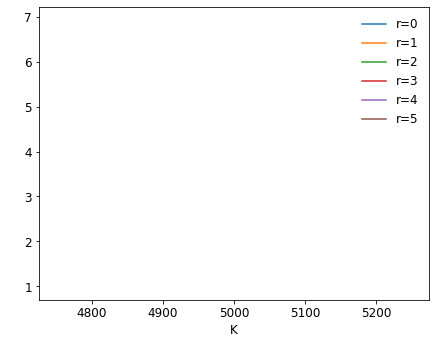

In [14]:
class Atom:
    """
    Reads atomic data, calculates level populations according to Boltzmann's law,
    and ionisation fractions according to Saha's law.
    """
    
    def __init__(self, atomfile=None):
        """
        Parameters
        ----------
        atomfile : string, optional
            Name of file with atomic data. If not present, atomic data needs
            to be loaded with the .read_atom method.
        """
        self.loaded = False
        if atomfile:
            self.read_atom(atomfile)
        
    def read_atom(self, filename):
        """
        Reads atom structure from text file.
        
        Parameters
        ----------
        filename: string
            Name of file with atomic data.
        """
        self.filename = filename[5:]
        tmp = np.loadtxt(filename, unpack=True)
        self.n_stages = int(tmp[2].max()) + 1
        # Get maximum number of levels in any stage
        self.max_levels = 0
        for i in range(self.n_stages):
            self.max_levels = max(self.max_levels, (tmp[2] == i).sum())
        # Populate level energies and statistical weights
        # Use a square array filled with NaNs for non-existing levels
        chi = np.empty((self.n_stages, self.max_levels))
        chi.fill(np.nan)
        self.g = np.copy(chi)
        for i in range(self.n_stages):
            nlevels = (tmp[2] == i).sum()
            chi[i, :nlevels] = tmp[0][tmp[2] == i]
            self.g[i, :nlevels] = tmp[1][tmp[2] == i]
        # Put units, convert from cm-1 to Joule
        chi = (chi / units.cm).to('aJ', equivalencies=units.spectral())
        # Save ionisation energies, saved as energy of first level in each stage
        self.chi_ion = chi[:, 0].copy()
        # Save level energies relative to ground level in each stage
        self.chi = chi - self.chi_ion[:, np.newaxis]
        self.loaded = True
        
    def compute_partition_function(self, temperature):
        """
        Computes partition functions using the atomic level energies and
        statistical weights.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        """
        if not self.loaded:
            raise ValueError("Missing atom structure, please load atom with read_atom()")
        temp = temperature[np.newaxis, np.newaxis]  # to allow broadcast
        return np.nansum(self.g[..., np.newaxis] * 
                            np.exp(-self.chi[..., np.newaxis] / 
                                      constants.k_B / temp), axis=1)
    
    def compute_excitation(self, temperature):
        """
        Computes the level populations relative to the ground state,
        according to the Boltzmann law.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        """
        pfunc = self.compute_partition_function(temperature)
        # Reshape arrays to allow broadcast
        temp = temperature[np.newaxis, np.newaxis]
        g_ratio = self.g[..., np.newaxis] / pfunc[:, np.newaxis]  # relative to total number of atoms in this stage
        chi = self.chi[..., np.newaxis]
        return g_ratio * np.exp(-chi / (constants.k_B * temp))
       
    def compute_ionisation(self, temperature, electron_pressure):
        """
        Computes ionisation fractions according to the Saha law.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        electron_pressure: astropy.units.quantity (scalar)
            Electron pressure in units of Pa or equivalent.
        """
        partition_function = self.compute_partition_function(temperature)
        electron_density = electron_pressure / (constants.k_B * temperature)
        saha_const = ((2 * np.pi * constants.m_e * constants.k_B * temperature) / 
                      (constants.h ** 2)) ** (3 / 2)
        nstage = np.zeros_like(partition_function) / units.m ** 3
        nstage[0] = 1. / units.m ** 3
        # Below we use the values for ionisation energies that are saved
        # in the first index of each excited state: self.chi[r + 1, 0]
        for r in range(self.n_stages - 1):
            nstage[r + 1] = (nstage[r] / electron_density * 2 * saha_const *
                             partition_function[r + 1] / partition_function[r] * 
                             np.exp(-self.chi_ion[r + 1, np.newaxis] / 
                                       (constants.k_B * temperature[np.newaxis])))
        # nansum is needed because the last stage might have only one level
        # (only ionisation potential)
        return nstage / np.nansum(nstage, axis=0)

    def compute_populations(self, temperature, electron_pressure):
        """
        Computes relative level populations for all levels and all
        ionisation stages using the Bolzmann and Saha laws.
        
        Parameters
        ----------
        temperature: astropy.units.quantity (scalar or array)
            Gas temperature in units of K or equivalent.
        electron_pressure: astropy.units.quantity (scalar)
            Electron pressure in units of Pa or equivalent.
        """
        return (self.compute_excitation(temperature) * 
                self.compute_ionisation(temperature, electron_pressure)[:, np.newaxis])


    def plot_partition_function(self, temperature):
        """
        Need ax infos.
        """
        U = self.compute_partition_function(temperature)
        for r in range(6):
            plt.plot(temperature, U[r], label=f'r={r:.0f}')
        plt.legend()
        plt.show()


    def plot_payne(self, temperature, electron_pressure):
        pops = self.compute_populations(temperature, electron_pressure)
        fig, ax = plt.subplots()
        ax.plot(np.tile(temperature, (self.n_stages,1)).T, pops[:,0].T, 'b-')
        n_levels = self.chi.shape[0]
        if n_levels > 1:
            ax.plot(np.tile(temperature, (self.n_stages,1)).T, pops[:,1].T, 'r--')
        if n_levels > 2:
            ax.plot(np.tile(temperature, (self.n_stages,1)).T, pops[:,2].T, 'k:')

        ax.set_yscale('log')
        ax.set_ylim(1e-6, 1.1)
        ax.set_xlabel('Temperature [K]')
        ax.set_ylabel('Populations')
        ax.set_title(f'Payne Curve for {self.filename[0:2]}')





Ca = Atom("data/Ca_atom.txt")
# Ca.plot_partition_function(temperature= 5000 * units.K)

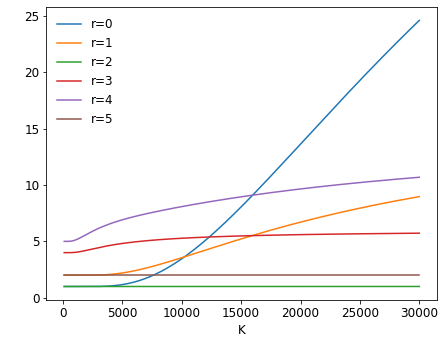

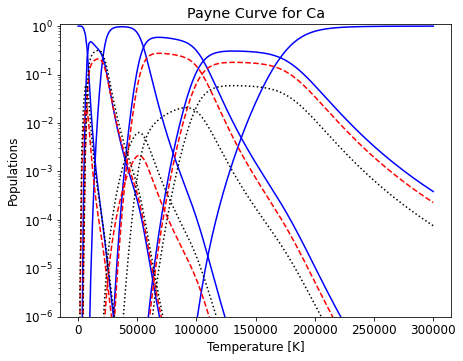

In [17]:
#   "payne" curve

#want to plot the level population

temperature = np.linspace(100, 30000, 200) * units.K
electron_pressure = 100 * units.kPa
Ca.plot_partition_function(temperature)
temperature = np.linspace(100, 300000, 200) * units.K
Ca.plot_payne(temperature, electron_pressure)


### Exercise 3

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">  
<i>

* Explain qualitatively why the solar $\text{Ca}^+$ K line is much stronger than the solar H $\alpha$ line, even though hydrogen is not ionised in the solar photosphere and low chromosphere ($T \approx$ 4000 - 6000 K) where these lines are formed, and calcium is far less abundant than hydrogen in the Sun: the Ca/H abundance ratio is only $N_\mathrm{Ca}/N_\mathrm{H} = 2 \times 10^{−6}$. Assume again that the observed line strength scales with the lower-level population density (which it does, although nonlinearly through a \"curve of growth\" as you will see in Project 2).
    
* Prove your explanation by computing and plotting the expected strength ratio of these two lines as function of temperature for $P_e = 10^2$ dyne cm $^{-2}$. Make use of `H_atom.txt` and `Ca_atom.txt`. 
    
* The relative population change $(\Delta n / \Delta T) / n$ is useful to to diagnose the temperature sensitivity of the populations of a given atomic stage. Plot in a log scale the relative population changes for the lower levels of $\text{Ca}^+$ K and H $\alpha$ vs. temperature, using  $\Delta T=$ 1 K. Around $T=$ 5600 K the $\text{Ca}^+$ K curve dips down to very  small values; the H $\alpha$ curve does that around $T=$ 9500  K. Thus, at $T \approx$ 5600 K the temperature sensitivity of $\text{Ca}^+$ K is much smaller than the temperature sensitivity of H $\alpha$. Compare these plots with plots of the populations of the lower levels for the two lines (normalise them to the maximum value of each for easier comparison). You should find that the population plots have a peak and two flanks. Explain each flank of the population plots and the dips in the temperature sensitivity plots.

* Find at which temperature the hydrogen in stellar photospheres with $P_e =$ 10 Pa is about 50% ionised. Plot the neutral and ionised fractions of hydrogen as a function of temperature.

</i>
</div>

We still have that strength scales linearly with the population density:

$$ \frac{n_{r,s}}{n_{r,t}} = \frac{g_{r,s}}{g_{r,t}} e^{-(\chi_{r,s} - \chi_{r,t})/kT} $$

In [7]:
#   strength ratio comparison
H = Atom("data/H_atom.txt")


# QUESTIONS
 * q1